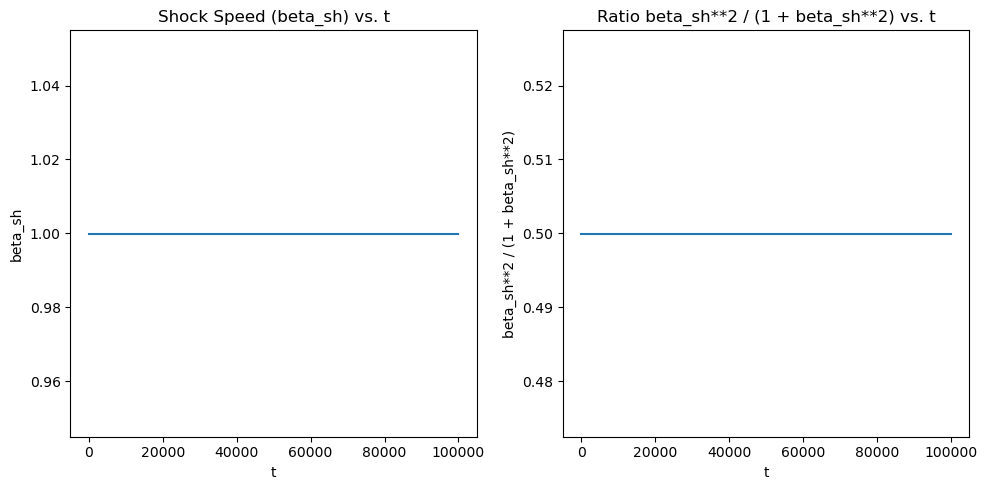

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy.integrate import odeint
import math as m 

#ici je définis beta_sh , r, t...


tetav=5
phi=5
c=3*10**8
mp = 1.67e-27
Gamma_sh_max=100
teta=5
E=10**51
n0=10**(-6)   #let's say 1 particle by cubic cm
mu=m.sin(teta)*m.sin(tetav)*m.cos(phi)+m.cos(teta)*m.cos(tetav)


def C_BM(E, n0, mp, c):
    return np.sqrt(17 * E / (8 * np.pi * n0 * mp * c**5))

def C_ST(E, n0, mp, c):
    return (2/5) * 1.15 * (E / (n0 * mp * c**5))**(1/5)

def radius(T, mu, c):
    def f(R, t):
        return T + mu * R / c

    Rp = 0
    Rs = 1
    while abs(Rp - Rs) > 10 ** (-2):
        sol = odeint(f, [0, Rs], [0, T])
        Rp = Rs
        Rs = sol[0][1]
    return Rs

    
def shock_speed(C_BM, C_ST, Gamma_sh_max,t,T):
    t=T+mu*radius(t,mu,c)/c
    sh_max = Gamma_sh_max
    mine=np.minimum((C_BM(E, n0, mp, c)**2) * (t)**(-3) + (C_ST(E, n0, mp, c)**2) * (t)**(-6/5), sh_max**2)
    beta_sh=np.sqrt(mine/(1+mine))
    return beta_sh
    
#tracé de betash et betash**2* gamma_sh**2 en fonction de petit t que je définis à partir de T
T_values=np.linspace(0,10**5,1000)
t_values = [T + mu * radius(T, mu, c) / c for T in T_values]
beta_sh_values = [shock_speed(C_BM, C_ST, Gamma_sh_max,t,T) for t,T in zip(t_values,T_values)]
beta_sh_ratio_values = [beta_sh**2 / (1 + beta_sh**2) for beta_sh in beta_sh_values]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t_values, beta_sh_values)
plt.xlabel('t')
plt.ylabel('beta_sh')
plt.title('Shock Speed (beta_sh) vs. t')

plt.subplot(1, 2, 2)
plt.plot(t_values, beta_sh_ratio_values)
plt.xlabel('t')
plt.ylabel('beta_sh**2 / (1 + beta_sh**2)')
plt.title('Ratio beta_sh**2 / (1 + beta_sh**2) vs. t')

plt.tight_layout()
#plt.show()

    

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t_values, beta_sh_values)
plt.xlabel('t')
plt.ylabel('beta_sh')
plt.title('Shock Speed (beta_sh) vs. t')

plt.subplot(1, 2, 2)
plt.plot(t_values, beta_sh_ratio_values)
plt.xlabel('t')
plt.ylabel('beta_sh**2 / (1 + beta_sh**2)')
plt.title('Ratio beta_sh**2 / (1 + beta_sh**2) vs. t')

plt.tight_layout()
plt.show()